In [9]:
# !pip install yfinance pandas matplotlib numpy
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [41]:
# List of stock tickers and the S&P 500 ticker
stocks = ["AAPL", "MSFT", "GOOGL", "AMZN", "NVDA", "TSLA", "BRK-B", "META", "JPM", "V"]
benchmark = "^GSPC"

# Max Return Weights (excluding S&P 500)
weights = {
    "AAPL": 0.1000,
    "MSFT": 0.1000,
    "GOOGL": 0.1000,
    "AMZN": 0.1000,
    "NVDA": 0.1000,
    "TSLA": 0.1000,
    "BRK-B": 0.1000,
    "META": 0.1000,
    "JPM": 0.1000,
    "V": 0.1000
}

In [42]:
# Initial investment amount
initial_investment = 500000

In [43]:
# Function to find the same day last year
def get_last_year_date():
    today = datetime.now()
    # Find the date exactly one year ago
    last_year_date = today - timedelta(days=365)
    return last_year_date

# Download data for all stocks and the benchmark
data = yf.download(stocks + [benchmark], period="1y")['Adj Close']

# Get the date of the same day last year
last_year_date = get_last_year_date().strftime('%Y-%m-%d')

# Ensure we have data up to this date last year (in case of holiday or missing data)
if last_year_date not in data.index:
    last_year_date = data.index[data.index.get_loc(last_year_date, method='backfill')].strftime('%Y-%m-%d')

# Calculate daily returns for each stock
daily_returns = data.pct_change().dropna()

# Multiply the daily returns by the weights to get weighted returns
portfolio_returns = (daily_returns * pd.Series(weights)).sum(axis=1)

# Calculate cumulative portfolio value over time
portfolio_value = (1 + portfolio_returns).cumprod() * initial_investment

# Normalize the portfolio index to start at the price on the same day last year
portfolio_index = portfolio_value / portfolio_value.loc[last_year_date]

# Normalize the S&P 500 index to start at the price on the same day last year
benchmark_value = (1 + daily_returns[benchmark]).cumprod() * initial_investment
benchmark_index = benchmark_value / benchmark_value.loc[last_year_date]


[*********************100%***********************]  11 of 11 completed


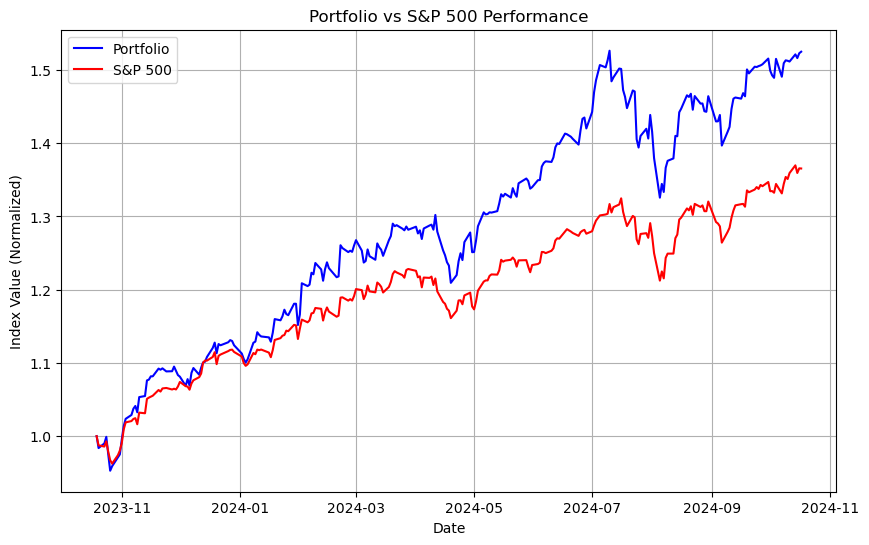

In [44]:
# Plot the portfolio index vs S&P 500 index
plt.figure(figsize=(10, 6))
plt.plot(portfolio_index, label="Portfolio", color="blue")
plt.plot(benchmark_index, label="S&P 500", color="red")
plt.title("Portfolio vs S&P 500 Performance")
plt.xlabel("Date")
plt.ylabel("Index Value (Normalized)")
plt.legend()
plt.grid(True)
plt.show()

In [29]:
# Function to find the most recent Monday
def get_last_monday():
    today = datetime.now()
    # Find the last Monday (if today is Monday, use today)
    last_monday = today - timedelta(days=today.weekday())
    return last_monday

# Download data starting from August 1, 2024
start_date = "2024-08-01"
data = yf.download(stocks + [benchmark], start=start_date)['Adj Close']

# Get the date of the most recent Monday
last_monday = get_last_monday().strftime('%Y-%m-%d')

# Ensure we have data up to this Monday (in case of holiday)
if last_monday not in data.index:
    last_monday = data.index[data.index.get_loc(last_monday, method='backfill')].strftime('%Y-%m-%d')

# Calculate daily returns for each stock
daily_returns = data.pct_change().dropna()

# Multiply the daily returns by the weights to get weighted returns
portfolio_returns = (daily_returns * pd.Series(weights)).sum(axis=1)

# Calculate cumulative portfolio value over time
portfolio_value = (1 + portfolio_returns).cumprod() * initial_investment

# Normalize the portfolio index to start at the price on the most recent Monday
portfolio_index = portfolio_value / portfolio_value.loc[last_monday]

# Normalize the S&P 500 index to start at the price on the most recent Monday
benchmark_value = (1 + daily_returns[benchmark]).cumprod() * initial_investment
benchmark_index = benchmark_value / benchmark_value.loc[last_monday]

# Scale the final values of both portfolio and benchmark to 500,000
scaling_factor = 500000 / portfolio_value.iloc[-1]
portfolio_value_scaled = portfolio_value * scaling_factor
benchmark_value_scaled = benchmark_value * scaling_factor

[*********************100%***********************]  11 of 11 completed


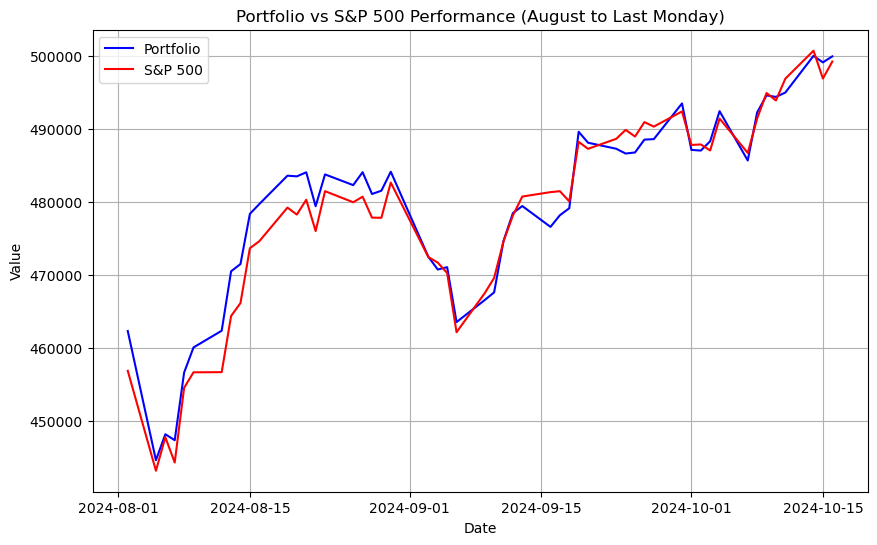

In [30]:
# Plot the result
plt.figure(figsize=(10, 6))
plt.plot(portfolio_value_scaled, label="Portfolio", color="blue")
plt.plot(benchmark_value_scaled, label="S&P 500", color="red")
plt.title("Portfolio vs S&P 500 Performance (August to Last Monday)")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()